# Financial Exploration

### Introduction
This notebook was created for the purpose of learning Python as a data analysis and visualization tool and is not intended to be investment advice. Feedback is greatly appreciated!  
Data taken from [Poloniex Public API](https://poloniex.com/support/api/).

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ohlc
# from mpl_finance import candlestick_ohlc
import seaborn as sns
%matplotlib inline

/Users/Kai/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
coins = {'BTC':'bitcoin', 'ETH':'ethereum', 'XRP':'ripple', 'LTC':'litecoin', 'DASH':'dash'}
ticker = list(coins.keys())

In [4]:
interval = "86400"

In [5]:
raw = {t: pd.read_json("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{}&start=1405699200&end=9999999999&period={}".format(ticker[index].upper(), interval)) 
       for index, t in enumerate(ticker)}

In [6]:
for t in ticker:
    raw[t].index = raw[t]['date']
    raw[t].drop('date', axis=1, inplace=True)

In [7]:
for t in ticker:
    print(t, raw[t].index[1])

BTC 2015-02-20 00:00:00
ETH 2015-08-09 00:00:00
XRP 2015-02-21 00:00:00
LTC 2015-03-08 00:00:00
DASH 2015-02-18 00:00:00


In [8]:
data = pd.concat(raw.values(), axis=1, keys=ticker)
data.columns.names = ['Ticker', 'Info']

In [9]:
data.tail().sort_index(ascending=False)

Ticker              BTC                                                      \
Info              close         high          low         open  quoteVolume   
date                                                                          
2017-10-19  5529.320000  5569.659533  5495.865433  5569.649533    94.193165   
2017-10-18  5563.000000  5609.387018  5100.000000  5609.387018  7989.881748   
2017-10-17  5609.387018  5780.107655  5512.684474  5765.000000  4799.397244   
2017-10-16  5765.000000  5800.000000  5565.000000  5715.000000  5516.727762   
2017-10-15  5715.000000  5880.870000  5434.140000  5840.000000  6600.634494   

Ticker                                           ETH                          \
Info              volume weightedAverage       close        high         low   
date                                                                           
2017-10-19  5.200927e+05     5521.554396  311.260001  314.306000  310.001360   
2017-10-18  4.272864e+07     5347.843666  313.495000  316.189740  287.000000   
2017-10-17  2.695895e+07     5617.153497  316.189740  334.483023  310.116900   
2017-10-16  3.134349e+07     5681.537263  334.716453  353.349113  330.704923   
2017-10-15  3.691414e+07     5592.513268  336.980000  343.683166  318.000000   

Ticker           ...                  LTC                                \
Info             ...          quoteVolume        volume weightedAverage   
date             ...                                                      
2017-10-19       ...          1695.095101  1.014872e+05       59.871073   
2017-10-18       ...        105382.589453  6.005208e+06       56.984819   
2017-10-17       ...         59739.833731  3.653141e+06       61.150848   
2017-10-16       ...         52629.394019  3.378608e+06       64.196226   
2017-10-15       ...        127086.853146  8.322252e+06       65.484758   

Ticker            DASH                                                   \
Info             close        high         low        open  quoteVolume   
date                                                                      
2017-10-19  294.260737  296.746901  294.260737  296.746901     6.113182   
2017-10-18  295.746902  298.474813  275.811000  298.326122  2693.430520   
2017-10-17  297.953500  303.499170  296.000000  301.689038  1589.309861   
2017-10-16  302.000010  315.000000  300.500000  309.979000  1852.714530   
2017-10-15  310.108864  317.795400  290.540546  315.650000  2519.893873   

Ticker                                     
Info               volume weightedAverage  
date                                       
2017-10-19    1799.935393      294.435123  
2017-10-18  777425.230464      288.637566  
2017-10-17  476601.043481      299.879247  
2017-10-16  568971.566397      307.101584  
2017-10-15  763779.765414      303.099973  

[5 rows x 35 columns]

### Highest Closing Prices
*Full period*

In [10]:
data.xs(key='close', axis=1, level='Info').max()

Ticker
BTC     5832.7255
ETH      389.4900
XRP        0.3920
LTC       87.3330
DASH     397.0000
dtype: float64

## Returns Correlation
*Oct 01, 2016 - Sep 30, 2017*

In [11]:
returns = pd.DataFrame(index=data.index)

In [12]:
for t in ticker:
    returns[t+'_return'] = data[t]['close'].pct_change()

In [13]:
print("NaN count: "+str(returns.loc['2016-10-01 00:00:00':'2017-09-30 00:00:00'].isnull().sum().sum()))

NaN count: 0


In [14]:
sns.set_style('whitegrid')
sns.set_context("talk")

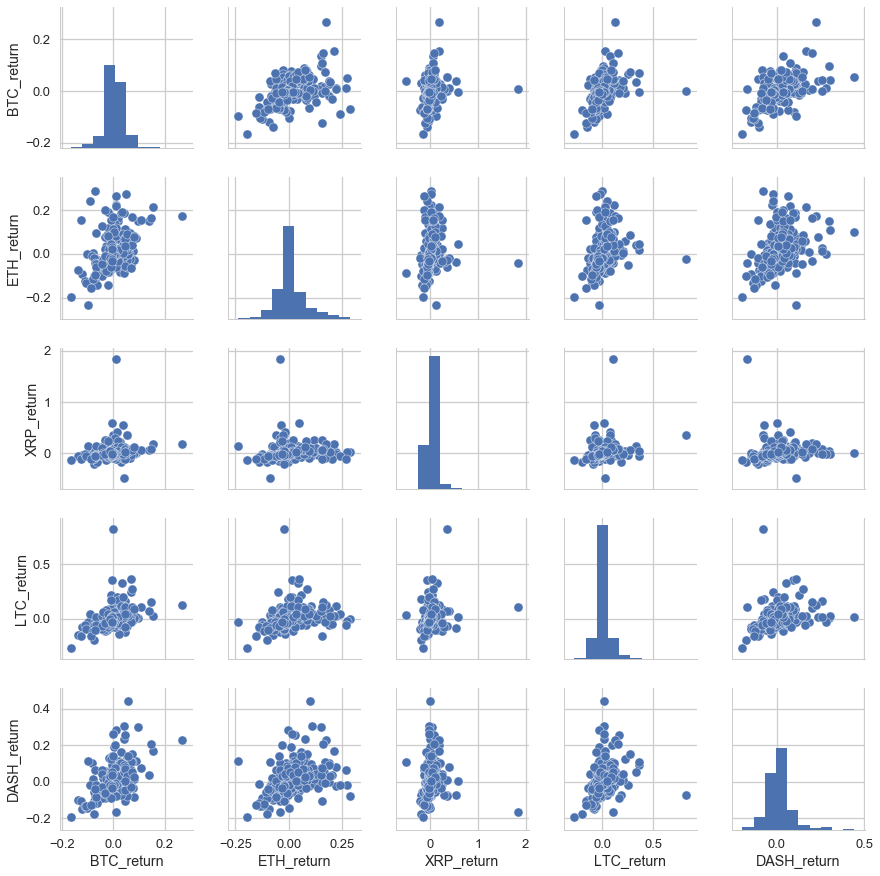

In [15]:
sns.pairplot(returns.loc['2016-10-01 00:00:00':'2017-09-30 00:00:00'])

## Best/Worst Day Returns
*Full period*

In [16]:
returns.idxmax()

BTC_return    2015-08-19
ETH_return    2015-08-13
XRP_return    2015-03-01
LTC_return    2015-03-10
DASH_return   2015-06-14
dtype: datetime64[ns]

In [17]:
returns.idxmin()

BTC_return    2015-08-18
ETH_return    2015-08-18
XRP_return    2015-03-03
LTC_return    2015-06-21
DASH_return   2015-05-06
dtype: datetime64[ns]

## Returns Standart Deviation
*Oct 01, 2016 - Sep 30, 2017*

In [18]:
returns.loc['2016-10-01 00:00:00':'2017-09-30 00:00:00'].std()

BTC_return     0.041999
ETH_return     0.069102
XRP_return     0.131865
LTC_return     0.080529
DASH_return    0.071287
dtype: float64

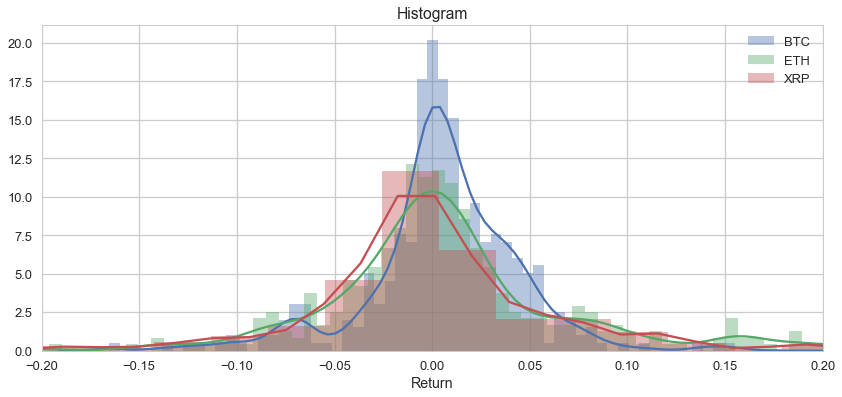

In [19]:
fig, ax = plt.subplots(figsize=(14,6),sharey=True)
for t in ticker[:3]:
    ax = sns.distplot(returns[t+'_return'].loc['2016-10-01 00:00:00':'2017-09-30 00:00:00'], kde=True, label=t, bins=80)
ax.set_xlim([-0.2, 0.2])
ax.set_xlabel("Return")
ax.legend()
plt.title("Histogram")
plt.show()

## Returns Standart Deviation in Period for Bitcoin
*Full period*

In [20]:
def period(x):
    if x % 2 == 0:
        return x/2-1
    else:
        return (x-1)/2

In [21]:
returns['period'] = pd.DatetimeIndex(returns.index).month
returns['period'] = returns['period'].apply(period)

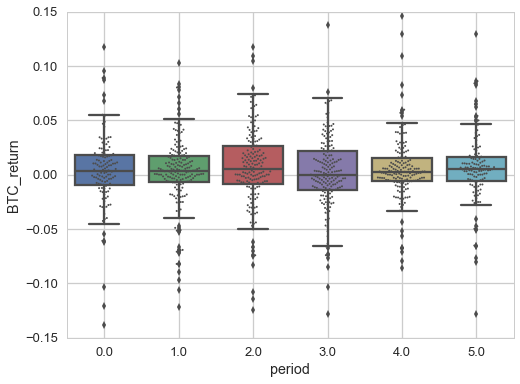

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="period", y="BTC_return", data=returns)
sns.swarmplot(x="period", y="BTC_return", data=returns, size=2, color=".3", linewidth=0)
ax.set_ylim([-0.15, 0.15])
ax.xaxis.grid(True)

## Price Time Series
*Full period*

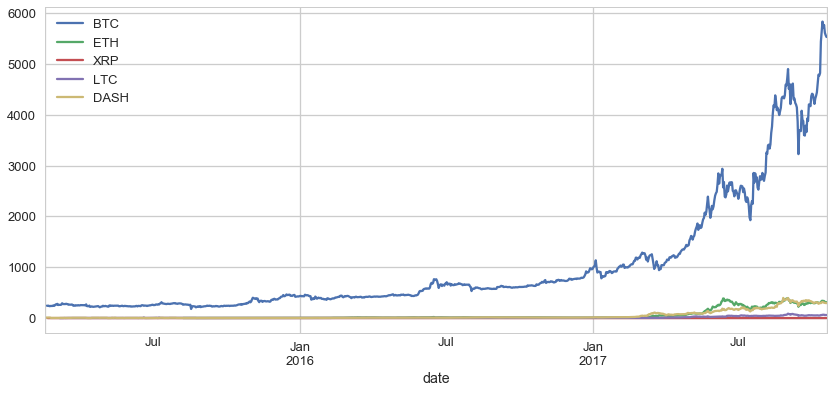

In [23]:
for t in ticker:
    data[t]['close'].plot(label=t, figsize=(14,6))
plt.legend()

## Candle Stick for Bitcoin
*Aug 01, 2017 - Sep 30, 2017*

In [24]:
data_AugSep = data.loc['2017-08-01 00:00:00':'2017-09-30 00:00:00']

(<matplotlib.collections.LineCollection at 0x11f39c5c0>,
 <matplotlib.collections.PolyCollection at 0x11f2938d0>)

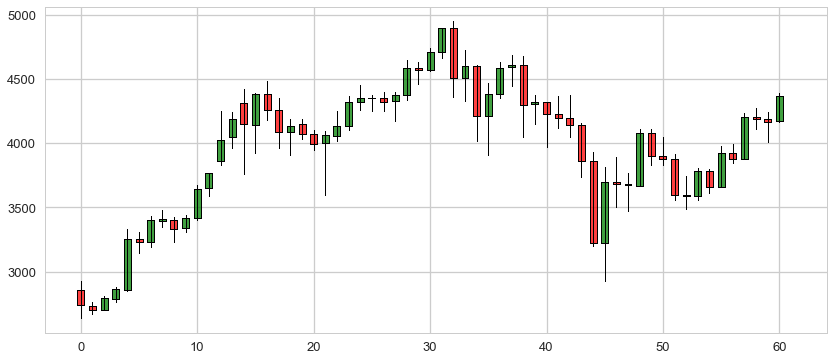

In [25]:
fig, ax = plt.subplots(figsize=(14,6))
candlestick2_ohlc(ax, data_AugSep['BTC']['open'], data_AugSep['BTC']['high'], data_AugSep['BTC']['low'], data_AugSep['BTC']['close'], width=0.6, colorup='g', colordown='r')

## Moving Averages for Bitcoin
*Jan 01, 2017 - Sep 30, 2017*

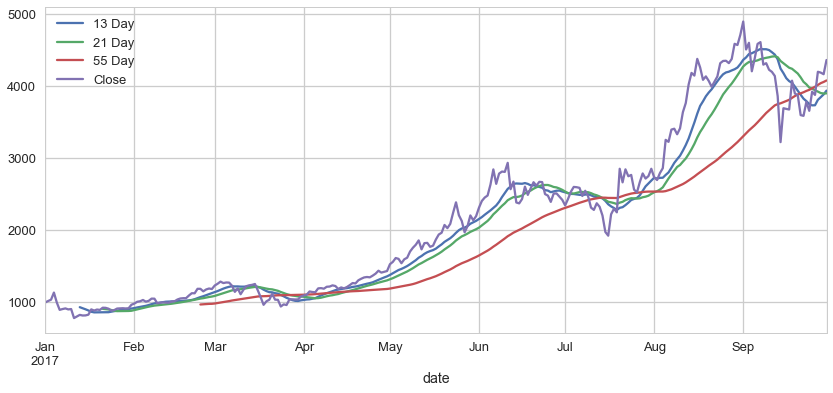

In [26]:
data['BTC']['close'].loc['2017-01-01 00:00:00':'2017-09-30 00:00:00'].rolling(window=13).mean().plot(label="13 Day", figsize=(14,6))
data['BTC']['close'].loc['2017-01-01 00:00:00':'2017-09-30 00:00:00'].rolling(window=21).mean().plot(label="21 Day", figsize=(14,6))
data['BTC']['close'].loc['2017-01-01 00:00:00':'2017-09-30 00:00:00'].rolling(window=55).mean().plot(label="55 Day", figsize=(14,6))
data['BTC']['close'].loc['2017-01-01 00:00:00':'2017-09-30 00:00:00'].plot(label="Close")
plt.legend()

## Price Correlation
*Full period*

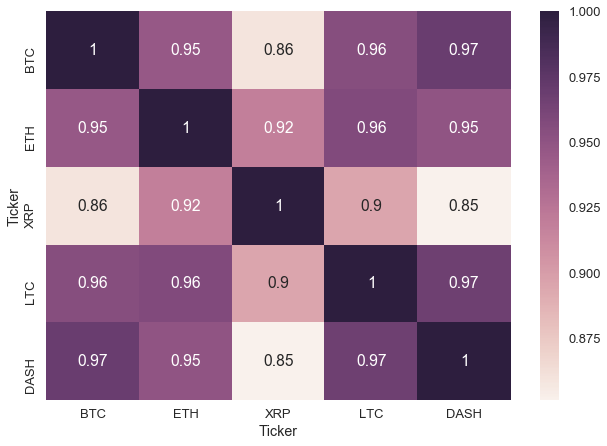

In [27]:
sns.heatmap(data.xs(key='close', axis=1, level='Info').corr(), annot=True)

/Users/Kai/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


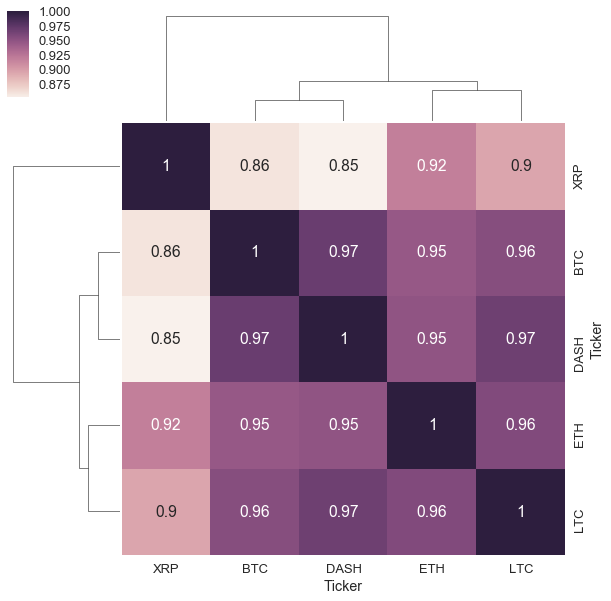

In [28]:
sns.clustermap(data.xs(key='close', axis=1, level='Info').corr(), annot=True)

 ## Volume
*Jan 01, 2017 - Sep 30, 2017*

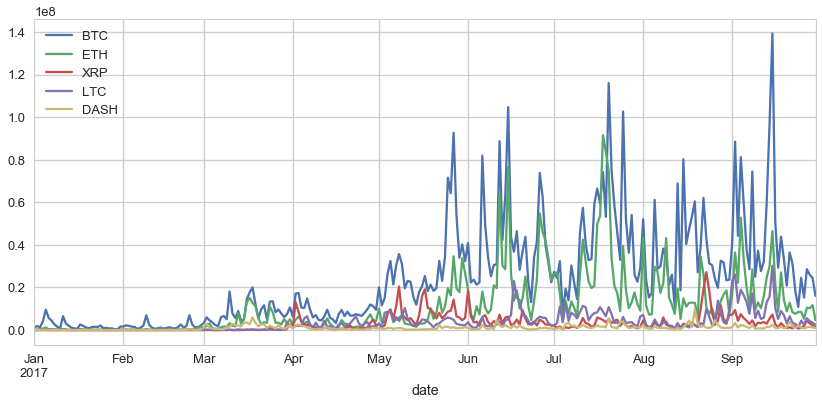

In [29]:
for t in ticker:
    data[t]['volume'].loc['2017-01-01 00:00:00':'2017-09-30 00:00:00'].plot(label=t, figsize=(14,6))
plt.legend()